# Sleep Data Exploration
Raw Garmin export: August 31 – September 27 
Goal: Clean the data and prepare it for visualization in Tableau.  

Steps:
1. Load raw data
2. Inspect structure (columns, sample rows)
3. Document data dictionary
4. Plan cleaning & transformations


In [1]:
import pandas as pd

# Load raw CSV from the project folder
df = pd.read_csv("../data/raw/Sleep.csv")

# Look at the first few rows
df.head()


,Sleep Score 4 Weeks,Score,Resting Heart Rate,Body Battery,Pulse Ox,Respiration,HRV Status,Quality,Duration,Bedtime,Wake Time
0,2025-09-27,80,57,56,--,13.49,40,Good,6h 52min,12:36 AM,7:38 AM
1,2025-09-26,70,56,57,--,15.00,40,Fair,9h 18min,11:58 PM,10:06 AM
2,2025-09-25,73,55,64,--,14.13,39,Fair,7h 15min,12:53 AM,8:57 AM
3,2025-09-24,72,59,50,--,14.37,38,Fair,7h 55min,12:57 AM,9:47 AM
4,2025-09-23,68,56,55,--,14.38,38,Fair,7h 33min,1:03 AM,10:01 AM


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sleep Score 4 Weeks  28 non-null     object 
 1   Score                28 non-null     int64  
 2   Resting Heart Rate   28 non-null     int64  
 3   Body Battery         28 non-null     int64  
 4   Pulse Ox             28 non-null     object 
 5   Respiration          28 non-null     float64
 6   HRV Status           28 non-null     int64  
 7   Quality              28 non-null     object 
 8   Duration             28 non-null     object 
 9   Bedtime              28 non-null     object 
 10  Wake Time            28 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.5+ KB


In [3]:
import os, sys, glob
print("Python exe:", sys.executable)
print("CWD:", os.getcwd())
print("Here:", os.listdir())
print("data/:", os.listdir("data") if os.path.exists("data") else "NO data folder")
print("data/raw/:", os.listdir("data/raw") if os.path.exists("data/raw") else "NO data/raw folder")
print("CSV candidates:", glob.glob("*.csv") + glob.glob("data/*.csv") + glob.glob("data/raw/*.csv") + glob.glob("../data/raw/*.csv"))


Python exe: /Library/Frameworks/Python.framework/Versions/3.13/bin/python3
CWD: /Users/brookeveater/Desktop/data-projects/sleep-project/notebooks
Here: ['01_explore_sleep_data.ipynb', '.ipynb_checkpoints']
data/: NO data folder
data/raw/: NO data/raw folder
CSV candidates: ['../data/raw/Sleep.csv']


In [4]:
df["Sleep Score 4 Weeks"].head()

0    2025-09-27
1    2025-09-26
2    2025-09-25
3    2025-09-24
4    2025-09-23
Name: Sleep Score 4 Weeks, dtype: object

In [5]:
# Convert string column into datetime
df["Date"] = pd.to_datetime(df["Sleep Score 4 Weeks"])

# Optionally drop the old long name
df = df.drop(columns=["Sleep Score 4 Weeks"])

# Confirm it worked
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Score               28 non-null     int64         
 1   Resting Heart Rate  28 non-null     int64         
 2   Body Battery        28 non-null     int64         
 3   Pulse Ox            28 non-null     object        
 4   Respiration         28 non-null     float64       
 5   HRV Status          28 non-null     int64         
 6   Quality             28 non-null     object        
 7   Duration            28 non-null     object        
 8   Bedtime             28 non-null     object        
 9   Wake Time           28 non-null     object        
 10  Date                28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 2.5+ KB


,Score,Resting Heart Rate,Body Battery,Pulse Ox,Respiration,HRV Status,Quality,Duration,Bedtime,Wake Time,Date
0,80,57,56,--,13.49,40,Good,6h 52min,12:36 AM,7:38 AM,2025-09-27
1,70,56,57,--,15.00,40,Fair,9h 18min,11:58 PM,10:06 AM,2025-09-26
2,73,55,64,--,14.13,39,Fair,7h 15min,12:53 AM,8:57 AM,2025-09-25
3,72,59,50,--,14.37,38,Fair,7h 55min,12:57 AM,9:47 AM,2025-09-24
4,68,56,55,--,14.38,38,Fair,7h 33min,1:03 AM,10:01 AM,2025-09-23


In [6]:
df["Date"].dt.day_name().head()

0     Saturday
1       Friday
2     Thursday
3    Wednesday
4      Tuesday
Name: Date, dtype: object

In [7]:
df["Date"].dt.month_name().head()

0    September
1    September
2    September
3    September
4    September
Name: Date, dtype: object

In [8]:
df.sort_values("Date").head()

,Score,Resting Heart Rate,Body Battery,Pulse Ox,Respiration,HRV Status,Quality,Duration,Bedtime,Wake Time,Date
27,40,61,29,--,12.96,39,Poor,5h 57min,10:56 PM,5:40 AM,2025-08-31
26,79,59,61,--,14.28,39,Fair,7h 43min,12:38 AM,8:59 AM,2025-09-01
25,51,64,37,--,14.18,38,Poor,7h 30min,11:23 PM,9:23 AM,2025-09-02
24,66,62,34,--,14.00,37,Fair,6h 7min,1:13 AM,8:07 AM,2025-09-03
23,58,59,37,--,14.26,36,Poor,4h 56min,2:55 AM,8:07 AM,2025-09-04


In [9]:
df.groupby(df["Date"].dt.day_name())["Score"].mean()


Date
Friday       69.50
Monday       70.75
Saturday     72.75
Sunday       66.00
Thursday     67.50
Tuesday      67.25
Wednesday    73.75
Name: Score, dtype: float64

In [10]:
import re
import numpy as np

def duration_to_hours(s):
    if s is None or (isinstance(s, float) and np.isnan(s)):
        return np.nan
    text = str(s).lower().replace(" ", "")
    # Find hours and minutes if present
    h_match = re.search(r"(\d+)\s*h", text)
    m_match = re.search(r"(\d+)\s*min", text)
    hours = int(h_match.group(1)) if h_match else 0
    minutes = int(m_match.group(1)) if m_match else 0
    return round(hours + minutes/60.0, 2)

df["Duration_hours"] = df["Duration"].apply(duration_to_hours)

# Quick sanity check
df[["Duration", "Duration_hours"]].head(10)


,Duration,Duration_hours
0,6h 52min,6.87
1,9h 18min,9.30
2,7h 15min,7.25
3,7h 55min,7.92
4,7h 33min,7.55
5,8h 58min,8.97
6,8h 4min,8.07
7,9h 50min,9.83
8,8h 29min,8.48
9,5h 19min,5.32


In [11]:
# 1) Type check: should be float
df["Duration_hours"].dtype

# 2) Range sanity: should be between, say, 0 and 14 hours
df["Duration_hours"].min(), df["Duration_hours"].max()

# 3) Spot any weird rows (NaNs or zeros that shouldn’t be)
df[df["Duration_hours"].isna() | (df["Duration_hours"] == 0)][["Duration","Duration_hours"]]


,Duration,Duration_hours


In [12]:
!pip3 install matplotlib

In [13]:
import matplotlib.pyplot as plt


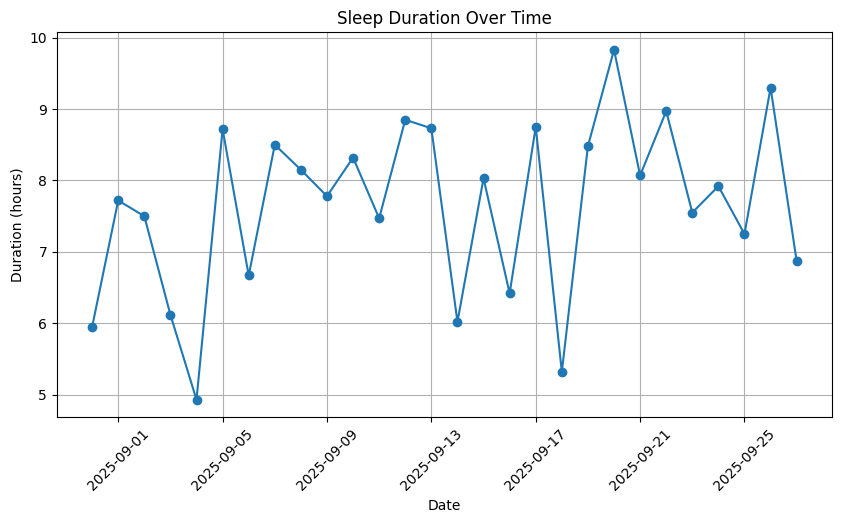

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Duration_hours"], marker="o", linestyle="-")
plt.title("Sleep Duration Over Time")
plt.xlabel("Date")
plt.ylabel("Duration (hours)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


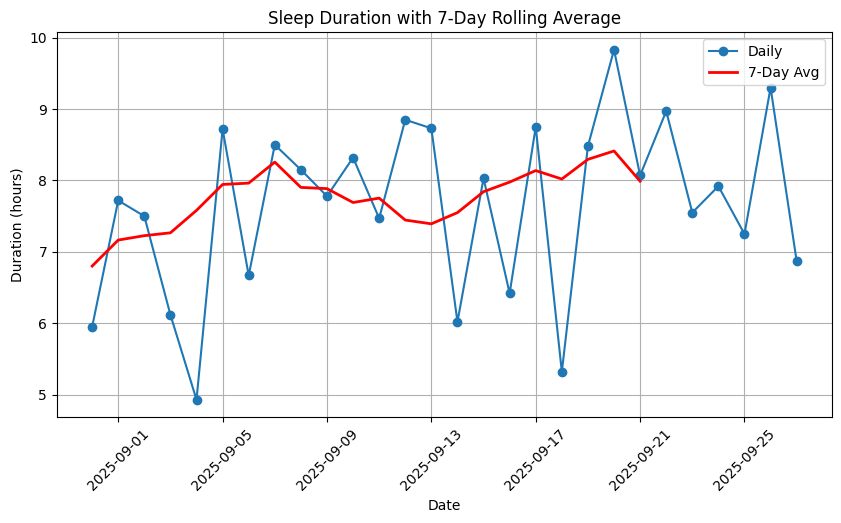

In [15]:
# Calculate 7-day rolling average
df["Rolling7"] = df["Duration_hours"].rolling(7).mean()

plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Duration_hours"], marker="o", linestyle="-", label="Daily")
plt.plot(df["Date"], df["Rolling7"], color="red", linewidth=2, label="7-Day Avg")
plt.title("Sleep Duration with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Duration (hours)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Bedtime and Wake Time with explicit format
df["Bedtime_dt"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Bedtime"],
                                  format="%Y-%m-%d %I:%M %p",
                                  errors="coerce")

df["Wake_dt"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Wake Time"],
                               format="%Y-%m-%d %I:%M %p",
                               errors="coerce")

# Fix cases where wake is before bedtime (means next day)
df.loc[df["Wake_dt"] < df["Bedtime_dt"], "Wake_dt"] += pd.Timedelta(days=1)

# Compare Garmin vs calculated
df["Sleep_hours_calc"] = (df["Wake_dt"] - df["Bedtime_dt"]).dt.total_seconds() / 3600
df[["Date","Bedtime","Wake Time","Duration_hours","Sleep_hours_calc"]].head()



,Date,Bedtime,Wake Time,Duration_hours,Sleep_hours_calc
0,2025-09-27,12:36 AM,7:38 AM,6.87,7.033333
1,2025-09-26,11:58 PM,10:06 AM,9.30,10.133333
2,2025-09-25,12:53 AM,8:57 AM,7.25,8.066667
3,2025-09-24,12:57 AM,9:47 AM,7.92,8.833333
4,2025-09-23,1:03 AM,10:01 AM,7.55,8.966667


In [20]:
(df["Wake_dt"] - df["Bedtime_dt"]).dt.total_seconds() / 3600


0      7.033333
1     10.133333
2      8.066667
3      8.833333
4      8.966667
5     10.000000
6      8.600000
7     11.516667
8     10.400000
9      5.566667
10     9.150000
11     6.700000
12     8.466667
13     6.383333
14     9.050000
15    10.083333
16     8.016667
17     8.866667
18     7.850000
19    12.250000
20     9.166667
21     6.983333
22     8.800000
23     5.200000
24     6.900000
25    10.000000
26     8.350000
27     6.733333
dtype: float64

In [21]:
# Compare Garmin vs calculated
df["Difference"] = df["Sleep_hours_calc"] - df["Duration_hours"]

print("Average difference (hours):", df["Difference"].mean())
print("Max difference (hours):", df["Difference"].max())
print("Min difference (hours):", df["Difference"].min())

# Show a few rows side by side
df[["Date","Duration_hours","Sleep_hours_calc","Difference"]].head(10)


Average difference (hours): 0.8527380952380954
Max difference (hours): 4.1
Min difference (hours): 0.0699999999999994


,Date,Duration_hours,Sleep_hours_calc,Difference
0,2025-09-27,6.87,7.033333,0.163333
1,2025-09-26,9.30,10.133333,0.833333
2,2025-09-25,7.25,8.066667,0.816667
3,2025-09-24,7.92,8.833333,0.913333
4,2025-09-23,7.55,8.966667,1.416667
5,2025-09-22,8.97,10.000000,1.030000
6,2025-09-21,8.07,8.600000,0.530000
7,2025-09-20,9.83,11.516667,1.686667
8,2025-09-19,8.48,10.400000,1.920000
9,2025-09-18,5.32,5.566667,0.246667


In [22]:
df["Sleep_efficiency"] = df["Duration_hours"] / df["Sleep_hours_calc"]
df[["Date","Duration_hours","Sleep_hours_calc","Sleep_efficiency"]].head()


,Date,Duration_hours,Sleep_hours_calc,Sleep_efficiency
0,2025-09-27,6.87,7.033333,0.976777
1,2025-09-26,9.30,10.133333,0.917763
2,2025-09-25,7.25,8.066667,0.898760
3,2025-09-24,7.92,8.833333,0.896604
4,2025-09-23,7.55,8.966667,0.842007


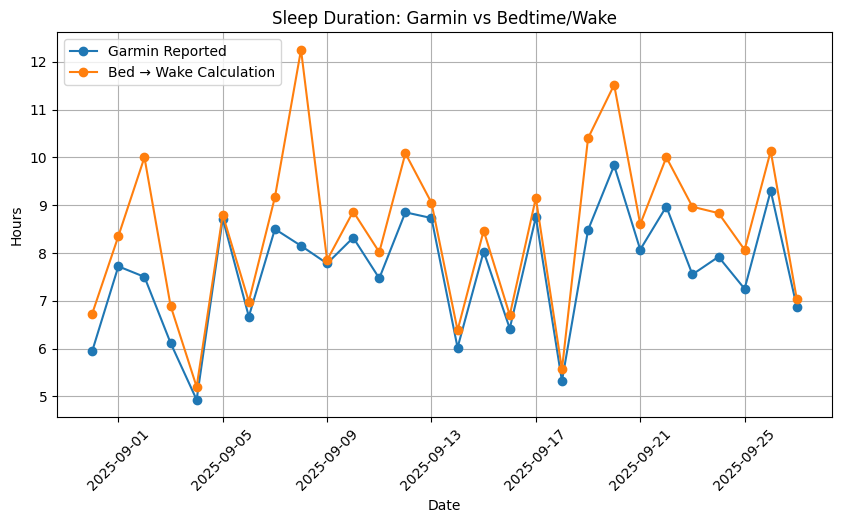

In [23]:
plt.figure(figsize=(10,5))

# Garmin's duration (blue)
plt.plot(df["Date"], df["Duration_hours"], marker="o", linestyle="-", label="Garmin Reported")

# Our calculated duration (orange)
plt.plot(df["Date"], df["Sleep_hours_calc"], marker="o", linestyle="-", label="Bed → Wake Calculation")

plt.title("Sleep Duration: Garmin vs Bedtime/Wake")
plt.xlabel("Date")
plt.ylabel("Hours")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


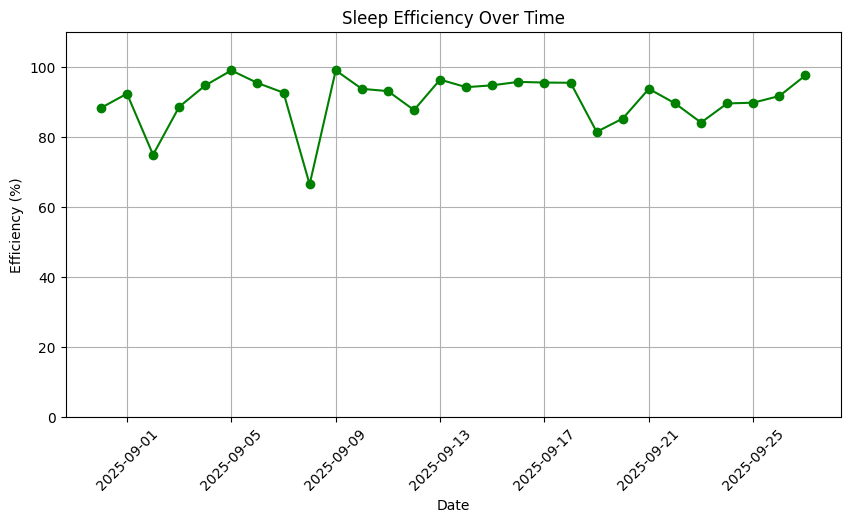

In [24]:
plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Sleep_efficiency"]*100, marker="o", linestyle="-", color="green")
plt.title("Sleep Efficiency Over Time")
plt.xlabel("Date")
plt.ylabel("Efficiency (%)")
plt.xticks(rotation=45)
plt.ylim(0, 110)  # keep it within sensible range
plt.grid(True)
plt.show()


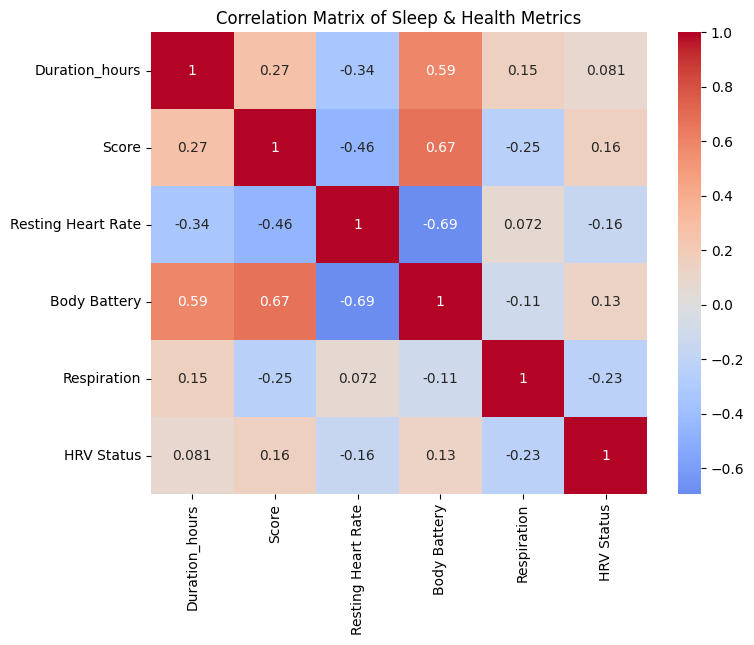

In [27]:
import seaborn as sns

# Pick only numeric columns
numeric_df = df[["Duration_hours","Score","Resting Heart Rate","Body Battery","Respiration","HRV Status"]]

# Correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Sleep & Health Metrics")
plt.show()


In [26]:
!python3 -m pip install seaborn

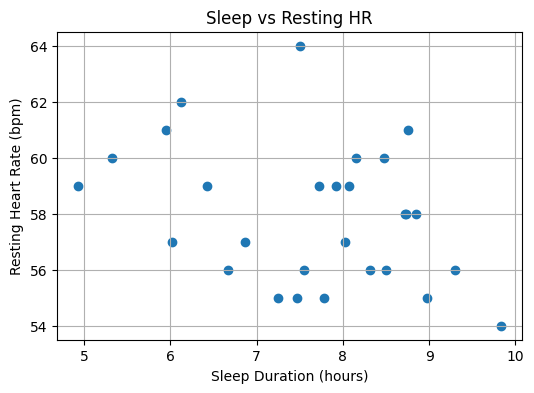

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(df["Duration_hours"], df["Resting Heart Rate"])
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Resting Heart Rate (bpm)")
plt.title("Sleep vs Resting HR")
plt.grid(True)
plt.show()


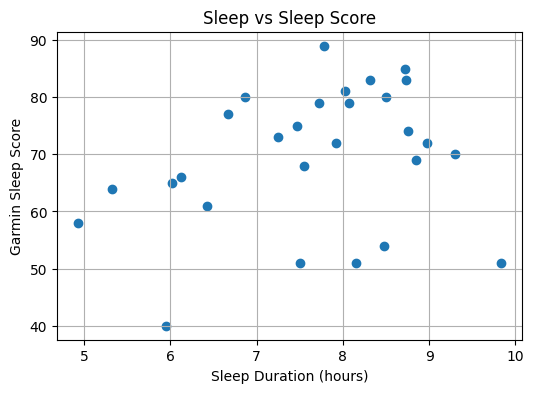

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(df["Duration_hours"], df["Score"])
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Garmin Sleep Score")
plt.title("Sleep vs Sleep Score")
plt.grid(True)
plt.show()


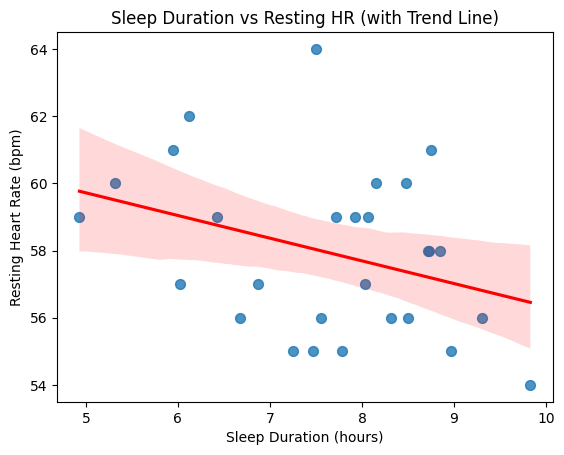

In [30]:
sns.regplot(x="Duration_hours", y="Resting Heart Rate", data=df, scatter_kws={"s":50}, line_kws={"color":"red"})
plt.title("Sleep Duration vs Resting HR (with Trend Line)")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Resting Heart Rate (bpm)")
plt.show()


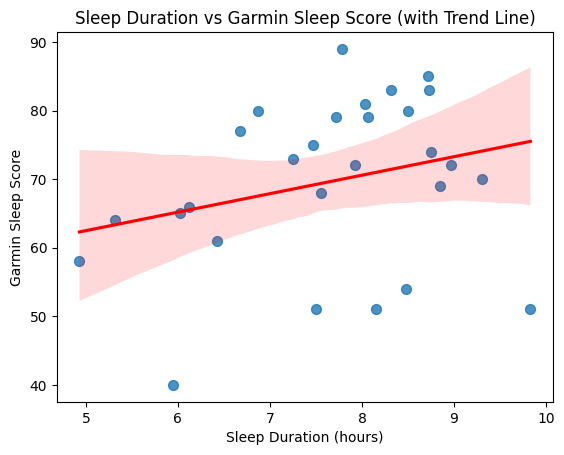

In [31]:
sns.regplot(x="Duration_hours", y="Score", data=df, scatter_kws={"s":50}, line_kws={"color":"red"})
plt.title("Sleep Duration vs Garmin Sleep Score (with Trend Line)")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Garmin Sleep Score")
plt.show()


In [32]:
print("Correlation (Sleep vs Resting HR):", df["Duration_hours"].corr(df["Resting Heart Rate"]))
print("Correlation (Sleep vs Score):", df["Duration_hours"].corr(df["Score"]))


Correlation (Sleep vs Resting HR): -0.3385974605698583
Correlation (Sleep vs Score): 0.2701098043233352


In [33]:
# Add weekday column
df["Weekday"] = df["Date"].dt.day_name()

# Average by weekday
weekday_avg = df.groupby("Weekday")[["Duration_hours","Sleep_efficiency","Resting Heart Rate"]].mean()

# Reorder to normal Mon-Sun order
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_avg = weekday_avg.reindex(weekday_order)

weekday_avg


,Duration_hours,Sleep_efficiency,Resting Heart Rate
Weekday,,,
Monday,8.2175,0.858821,57.75
Tuesday,7.3125,0.885325,58.50
Wednesday,7.7775,0.919548,59.50
Thursday,6.2425,0.933584,57.25
Friday,8.8375,0.900436,58.00
Saturday,8.0250,0.937524,56.25
Sunday,7.1350,0.923097,58.25


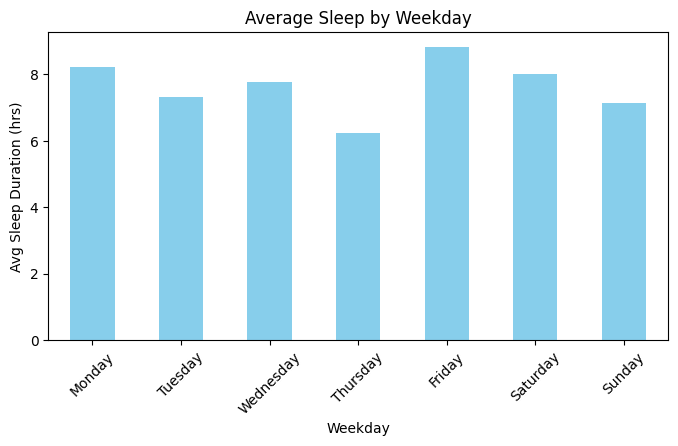

In [34]:
weekday_avg["Duration_hours"].plot(kind="bar", figsize=(8,4), color="skyblue", rot=45)
plt.ylabel("Avg Sleep Duration (hrs)")
plt.title("Average Sleep by Weekday")
plt.show()


In [35]:
# Define high/low based on median efficiency
median_eff = df["Sleep_efficiency"].median()

df["Efficiency_group"] = df["Sleep_efficiency"].apply(lambda x: "High" if x >= median_eff else "Low")

df.groupby("Efficiency_group")[["Duration_hours","Resting Heart Rate","Score"]].mean()


,Duration_hours,Resting Heart Rate,Score
Efficiency_group,,,
High,7.292857,57.642857,75.285714
Low,8.006429,58.214286,64.000000


In [36]:
df["Sleep_debt"] = 8 - df["Duration_hours"]
df["Sleep_debt"].describe()


count    28.000000
mean      0.350357
std       1.228159
min      -1.830000
25%      -0.555000
50%       0.150000
75%       1.180000
max       3.070000
Name: Sleep_debt, dtype: float64

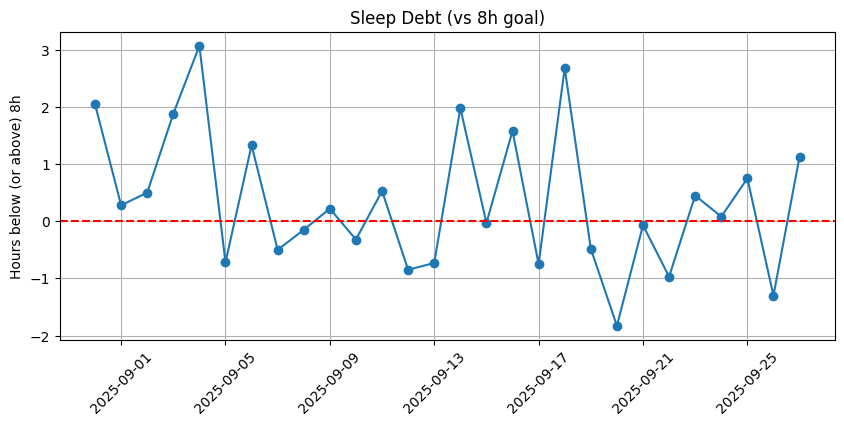

In [37]:
plt.figure(figsize=(10,4))
plt.plot(df["Date"], df["Sleep_debt"], marker="o", linestyle="-")
plt.axhline(0, color="red", linestyle="--")
plt.title("Sleep Debt (vs 8h goal)")
plt.ylabel("Hours below (or above) 8h")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [38]:
# Save clean dataset
df.to_csv("../data/processed/sleep_clean.csv", index=False)
